# Deepfake Audio Detection Project
#### Summer 2025 Data Science Project
**Contributors:** Mohe Edeen Abu Maizer, Safwah Ashraf

**Repository:** https://github.com/MoheEdeen/Deepfake-Detection

**Date:** July 2025

---

## Contributions



**Member**: Mohe Edeen Abu Maizer

* Project idea: Came up with project idea to detect wether or not audio is fake or real.
* Dataset Curation and Preprocessing: Found multiple datasets for the project itself, and got the required data to use for the project while removing unnecessary outliers and redundancies.
* Exploration and Summary Statistics: Check basic facts about dataset to catch problems early; Conducted multiple statistical tests to ensure the dataset was balanced, checked for class distribution.
* ML Algorithm Design/Development: Extracted features from audio samples through the use of the librosa library, in addition to turning the audios into spectorgram for analysis. Create two neural networks (CNN and MLP) in order to test which method would produce better accuracy.
* ML Algorithm Training and Test Data Analysis: Trained the CNN and MLP neural networks over 20 Epochs and 100 Epochs repsectively, created loss again epoch graphs in addition to a classification report and confusion matrix to analyze which model is better for use.
* Visualization, Result Analysis, Conclusion: Utilized graphs such as loss x epoch, classification reports, PCA analysis, and confusion matrix to analyze the data and the accuracy of the models.
* Final Tutorial Report Creation: Helped write documentation and fix up technical terms when needed.

<br>

Member: Safwah Ashraf

* Exploration and Summary Statistics: Check basic facts about dataset to catch problems early; Conducted multiple statistical tests to ensure the dataset was balanced, checked for class distribution.
* ML Algorithm Design/Development: Extracted features from audio samples using both traditional methods and a pre-trained model (PANNs); Implemented multiple machine learning algorithms including Logistic Regression, Random Forest, Decision Tree, and K-Nearest Neighbors to classify audio as real or fake.
* ML Algorithm Training and Test Data Analysis: Trained the begining machine learning models (Logistic Regression, Random Forest, Decision Tree, K-Nearest Neighbors) on the extracted features and evaluated their performance using validation and test data samples.
* Visualization, Result Analysis, Conclusion: Used plots to highlight valuable insights about model behavior. Summarized the overall findings and discussed about the best model and main takeaways from the project.
* Final Tutorial Report Creation: Clearly formatted the entire project documentation as per the instructions.

## Introduction


The advancement of technology has truly been a blessing for us humans in many ways. From communication to education, healthcare, entertainment and the list goes on. But unfortunately, we are at a point where the same tools that help us can also be used to harm us. One of the most concerning and sickening examples of this is the use of deepfake audio to impersonate known and trusted voices like a parent, boss, or colleague to scam people. A deepfake audio is a fake voice recording that is created using artificial intelligence to sound just like a real person. It can exactly copy someone's accent, tone, and even emotions, and this makes it very hard for people to tell if it's real or not. These fake recordings can be so realistic that victims can end up sharing private details, losing money, etc., without even realizing what they have done. For example, in 2019, criminals used AI voice technology to create deepfake audio and impersonate a CEO of a UK ENERGY FIRM, convincing an executive of that company to send $243,000 to a fraudulent supplier [[**source**](https://member.texasbankers.com/Magazine/Magazine/Features/2024-11/24-11-Deepfake-Danger.aspx)].

A worse example than this is when a Japanese company's manager transferred **$35 million** to criminals after criminals used deepfake audio to impersonate the voice of the director of his parent business, convincing the manager to authorize the payment [[**source**](https://www.forbes.com/sites/thomasbrewster/2021/10/14/huge-bank-fraud-uses-deep-fake-voice-tech-to-steal-millions/?ss=cybersecurity&sh=39f72c2c7559)]. These examples show us the consequences of not being able to distinguish between real and AI-generated speech and highlight how dangerous it can get when we can't.

In this project, our goal is to address this problem by developing and training a machine learning model that can identify deepfake audio. We are going to investigate deepfake audio detection using supervised learning. We will analyze labeled .wav files from the **Fake-or-Real (FoR)** dataset to extract acoustic features and distinguish between real and synthetic speech generated by advanced TTS models. With our analysis, the main question that we are trying to answer is: "can we build/train a reliable machine learning model that will be able to accurately detect whether an audio clip is real or fake?". Answering this question is really important because it can help prevent scams, protect people's privacy, maintain trust in digital communication, and even potentially save lives as well.

**Goal**: Perform data preprocessing, statistical analysis, hypothesis testing and use machine learning to understand the characteristics of real and fake audio samples and build a model that can reliably differentiate them.

---

## Necessary imports and Google drive setup

In this section, we are importing the basic and common libraries we will use in this project. We may add more imports in later sections when needed.

In [ ]:
!pip install audioflux
!pip install tensorflow librosa opencv-python
!pip install panns-inference

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.8/70.8 MB 6.0 MB/s eta 0:00:00


In [ ]:
import pathlib
import pandas as pd
import numpy as np
import soundfile as sf
import scipy.stats as sc
from scipy.stats import chisquare, chi2_contingency, f_oneway

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from statsmodels.stats.proportion import proportions_ztest

from google.colab import drive

import audioflux as af
import librosa
import cv2

import tensorflow as tf
from tensorflow.keras import layers, models

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim

from panns_inference import AudioTagging, labels

Here, we are mounting Google Drive so that we can access our dataset and import/export files directly from collab.

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Curation


**Data source**: https://www.kaggle.com/datasets/mohammedabdeldayem/the-fake-or-real-dataset

**What is this dataset and why we chose this:** The dataset we chose is able to provide us with many different variations of the data we are looking for. The more data we have, that are official and evidently used before, the stronger our
model and our project will be. The dataset we chose have labeled and realistic data which
will be ideal for this project. For example this Fake or Real dataset offers a large (more
than 195,000) utterances from real humans in addition to generated speech. Additionally, what
strengthens this dataset is that it gets such data from the latest TTS models, such as Deep Voice 3
and Google Wavenet TTS and many other reliable datasets. This type of dataset will
allow us to train our model, plot and analyze the relationships and key variables that will help
uncover the real from fake audio.

<br>

**Actual Data processing:**

To begin, we extracted audio data from two separate directories, one containing normalized audio clips but balanced in terms of gender and class and normalized in terms of sample rate, volume and number of channels. (for-norm) and the other containing rerecorded versions; to simulate a scenario where an attacker sends an utterance through a voice channel such as a phone call or a voice message (for-rerecorded). Each version includes training, testing, and validation subfolders, which are further divided into real and fake classes.

Using a nested loop structure, we traversed each .wav file and used the soundfile library (sf.info()) to extract attributes such as:

- Full file path
- Dataset version (norm or rerec)
- Data split (training, testing, validation)
- Label (real or fake)
- Numeric label ID
- Duration (in seconds)
- Samplerate (Hz)

These entries were stored in a Pandas DataFrame.

#### **IMPORTANT NOTE**:

This code is commented out as we saved the results to a csv file for faster processing, if you want to run these cells keep in mind they do take a lot of time to run.

---

In [ ]:
# dataset_path = "/content/drive/MyDrive/CMSC320/Project"
# dataset_norm = pathlib.Path(dataset_path + "/for-norm/for-norm/")
# dataset_norm.mkdir(parents=True, exist_ok=True)
# dataset_rerec =pathlib.Path(dataset_path + "/for-rerec/for-rerecorded")
# dataset_rerec.mkdir(parents=True, exist_ok=True)

In [ ]:
# rows = []

# for version_name, dataset_path in [("norm", dataset_norm), ("rerec", dataset_rerec)]:
#     for split_folder in dataset_path.iterdir():
#         for label_folder in split_folder.iterdir():
#             for wav_file in label_folder.iterdir():
#               curr_file_path = str(wav_file)
#               curr_version = version_name
#               curr_type_of_file = split_folder.name
#               curr_label = label_folder.name
#               curr_label_id = 1 if curr_label == "real" else 0
#               curr_sound_file = sf.info(wav_file)
#               curr_duration = curr_sound_file.duration
#               curr_samplerate = curr_sound_file.samplerate
#               curr_row = {"filepath": curr_file_path, "version": curr_version, "type": curr_type_of_file, "label": curr_label, "label_id": curr_label_id, "duration": curr_duration, "samplerate": curr_samplerate}
#               # print(curr_row)
#               rows.append(curr_row)
# df = pd.DataFrame(rows)
# display(df)


In [ ]:
# df.to_csv("audio_data.csv", index=False)
# files.download("audio_data.csv")

In [ ]:
csv_file = "/content/drive/MyDrive/CMSC320/Project/audio_data.csv"
df = pd.read_csv(csv_file)
df.reset_index(drop=True, inplace=True)
display(df)

,filepath,version,type,label,label_id,duration,samplerate
0,/content/drive/MyDrive/CMSC320/Project/for-nor...,norm,testing,real,1,2.190375,16000
1,/content/drive/MyDrive/CMSC320/Project/for-nor...,norm,testing,real,1,1.443375,16000
2,/content/drive/MyDrive/CMSC320/Project/for-nor...,norm,testing,real,1,3.116687,16000
3,/content/drive/MyDrive/CMSC320/Project/for-nor...,norm,testing,real,1,2.540125,16000
4,/content/drive/MyDrive/CMSC320/Project/for-nor...,norm,testing,real,1,3.261563,16000
...,...,...,...,...,...,...,...
18374,/content/drive/MyDrive/CMSC320/Project/for-rer...,rerec,training,real,1,1.975313,16000
18375,/content/drive/MyDrive/CMSC320/Project/for-rer...,rerec,training,real,1,1.985875,16000
18376,/content/drive/MyDrive/CMSC320/Project/for-rer...,rerec,training,real,1,1.986250,16000
18377,/content/drive/MyDrive/CMSC320/Project/for-rer...,rerec,training,real,1,1.920313,16000


## Exploratory data analysis

### Dataset summary and Basic statistic

Before we dive into doing all sorts of analyis, it's important for us to look at the basic structure of our dataset. This will help us understand what kind of data we're working with. Below, we check some basic facts about our dataset, like how many total samples we have, how many features or columns are included in our dataset, whether there are any missing values or not etc. These simple checks are certainly going to help us catch any problems early!

Number of samples and features:

In [ ]:
df.shape

(18379, 7)

From above code, we can see that we have 18379 samples and 7 features in our dataset. These numbers can increase or decrease as we start polishing our dataset to make it perfect for our machine learning model.

Checking for missing values in our dataset:

In [ ]:
df.isnull().sum()

,0
filepath,0
version,0
type,0
label,0
label_id,0
duration,0
samplerate,0


Fortunately, we do not have any missing values in our dataset! That's good news for us.

Column names and types:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18379 entries, 0 to 18378
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   filepath    18379 non-null  object 
 1   version     18379 non-null  object 
 2   type        18379 non-null  object 
 3   label       18379 non-null  object 
 4   label_id    18379 non-null  int64  
 5   duration    18379 non-null  float64
 6   samplerate  18379 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 1005.2+ KB


If we want to take a quick glance at all the feautres we have in our dataset and get information about them, the above table is perfect for that.

Summary statistics:

In [ ]:
df.describe()

,label_id,duration,samplerate
count,18379.000000,18379.000000,18379.0
mean,0.483051,1.984909,16000.0
std,0.499726,0.521096,0.0
min,0.000000,0.375625,16000.0
25%,0.000000,1.924500,16000.0
50%,0.000000,1.979688,16000.0
75%,1.000000,1.993313,16000.0
max,1.000000,38.683437,16000.0


The above code shows us stats like mean, minimum, maximum, standard deviation etc. for all numeric columns. We can use this to understand the overall range of our data if needed, spot any unusual values, and get a quick summary of the dataset's distribution!

### Dealing with outliers

To better understand how audio duration differs between real and fake samples, we use matplotlib to plot a box and whisker plot of the duration feature grouped by label.

When looking at the boxplot for the duration grouped by the audio clips, we can see that both types share a similar median which is around 2 second clips. However there are some outliers as seen by the second plot that can go more than 20 seconds (for only one type).

Such outliers would cause some issues down the line if we do not exclude them, as our model might be trained that the longer the clip the more likely it is real, which is untrue. This can be concluded because for the fake audio samples plot, the outliers do not exceed 6 seconds (unlike the real), yet they do go as low as 0.1 seconds unlike the real clips.

We can also see that for the real audio sample clips, there is a much tighter quartile range, unlike the fake ones which vary more widely.



/tmp/ipython-input-95-3143717109.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0].boxplot(grouped_label_duration, labels=["Fake", "Real"], showfliers=False)
/tmp/ipython-input-95-3143717109.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[1].boxplot(grouped_label_duration, labels=["Fake", "Real"])


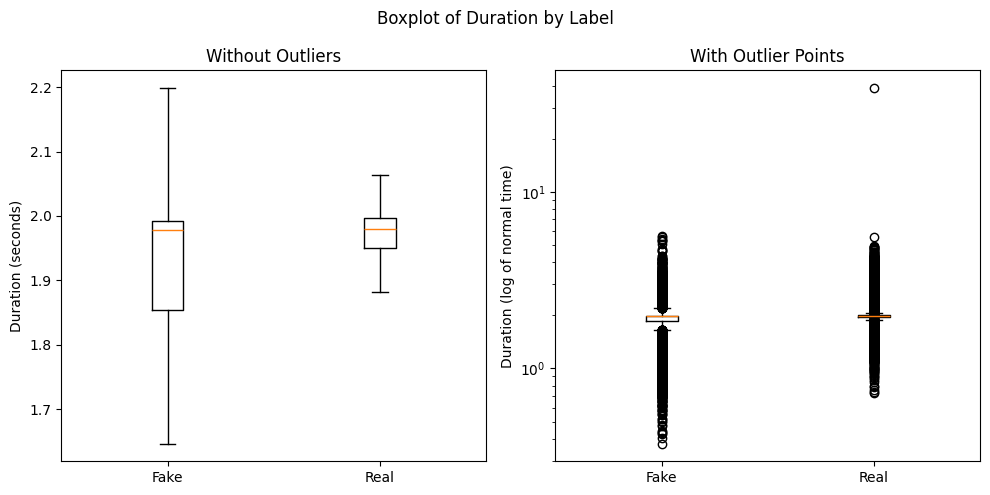

In [ ]:
grouped_label_duration = [df[df["label"] == "fake"]["duration"], df[df["label"] == "real"]["duration"]]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].boxplot(grouped_label_duration, labels=["Fake", "Real"], showfliers=False)
axs[0].set_title("Without Outliers")
axs[0].set_ylabel("Duration (seconds)")

axs[1].boxplot(grouped_label_duration, labels=["Fake", "Real"])
axs[1].set_title("With Outlier Points")
axs[1].set_ylabel("Duration (log of normal time)")
axs[1].set_yscale("log")

fig.suptitle("Boxplot of Duration by Label")
plt.tight_layout()
plt.show()

Looking at the graph, it is clear that the distribution between fake and real audio distribution is not valid or not ideal as there exists extreme outliers that go up to 30 seconds in the real type. We have to fix this.

### Removing Outliers from Duration

Now that we can see how the duration is distributed, we want to remove the outliers before moving on. The reason for this is to make sure our model doesn't learn patterns that are not going to be helpful in making accurate predictions but most importantly, we want to make sure our model doesn't give us unreliable result. For example, if some real clips are way too long, the model might think real means longer, which is not true. We calculate the IQR (interquartile range) for both fake and real durations to find these outliers. Any duration that is way too small or too large (beyond the lower or upper fence) will be removed from the dataframe.

In [ ]:
fake_duration = np.log2(df[df["label"] == "fake"]["duration"])
real_duration = np.log2(df[df["label"] == "real"]["duration"])

Q1_fake = fake_duration.quantile(0.25)
Q3_fake = fake_duration.quantile(0.75)

Q1_real = real_duration.quantile(0.25)
Q3_real = real_duration.quantile(0.75)

IQR_fake = Q3_fake - Q1_fake
IQR_real = Q3_real - Q1_real

lower_fake_fence = Q1_fake - (3 * IQR_fake)
upper_fake_fence = Q3_fake + (3 * IQR_fake)

lower_real_fence = Q1_real - (3 * IQR_real)
upper_real_fence = Q3_real + (3 * IQR_real)

upper_fake_array = np.where((df["label"] == "fake") & (np.log2(df["duration"]) >= upper_fake_fence))[0]
lower_fake_array = np.where((df["label"] == "fake") & (np.log2(df["duration"]) <= lower_fake_fence))[0]

upper_real_array = np.where((df["label"] == "real") & (np.log2(df["duration"]) >= upper_real_fence))[0]
lower_real_array = np.where((df["label"] == "real") & (np.log2(df["duration"]) <= lower_real_fence))[0]

df.drop(index=upper_fake_array, inplace=True)
df.drop(index=lower_fake_array, inplace=True)

df.drop(index=upper_real_array, inplace=True)
df.drop(index=lower_real_array, inplace=True)

print(upper_fake_fence, lower_real_fence, upper_real_fence, lower_real_fence)
df.reset_index(drop=True, inplace=True)
display(df)

1.305635921629112 0.8642228714769554 1.0969957505962125 0.8642228714769554


,filepath,version,type,label,label_id,duration,samplerate
0,/content/drive/MyDrive/CMSC320/Project/for-nor...,norm,testing,real,1,1.932500,16000
1,/content/drive/MyDrive/CMSC320/Project/for-nor...,norm,testing,real,1,2.083188,16000
2,/content/drive/MyDrive/CMSC320/Project/for-nor...,norm,testing,real,1,2.084125,16000
3,/content/drive/MyDrive/CMSC320/Project/for-nor...,norm,testing,real,1,2.037500,16000
4,/content/drive/MyDrive/CMSC320/Project/for-nor...,norm,testing,real,1,2.028500,16000
...,...,...,...,...,...,...,...
14024,/content/drive/MyDrive/CMSC320/Project/for-rer...,rerec,training,real,1,1.975313,16000
14025,/content/drive/MyDrive/CMSC320/Project/for-rer...,rerec,training,real,1,1.985875,16000
14026,/content/drive/MyDrive/CMSC320/Project/for-rer...,rerec,training,real,1,1.986250,16000
14027,/content/drive/MyDrive/CMSC320/Project/for-rer...,rerec,training,real,1,1.920313,16000


### Plotting Duration Distribution After Outlier Removal

After removing outliers, we now replot the boxplot to see how the cleaned data
looks like. This helps us check if our removal process worked and if the distributions look more balanced.

/tmp/ipython-input-97-3143717109.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0].boxplot(grouped_label_duration, labels=["Fake", "Real"], showfliers=False)
/tmp/ipython-input-97-3143717109.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[1].boxplot(grouped_label_duration, labels=["Fake", "Real"])


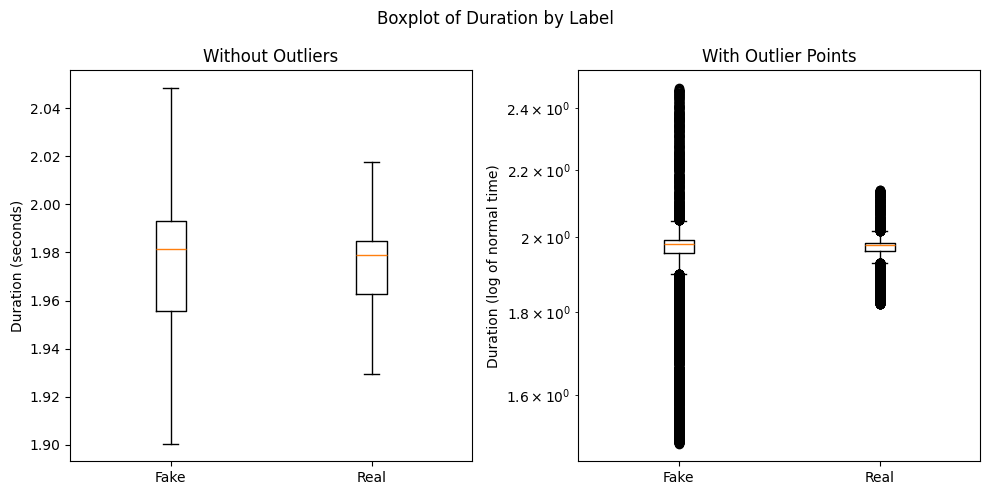

In [ ]:
grouped_label_duration = [df[df["label"] == "fake"]["duration"], df[df["label"] == "real"]["duration"]]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].boxplot(grouped_label_duration, labels=["Fake", "Real"], showfliers=False)
axs[0].set_title("Without Outliers")
axs[0].set_ylabel("Duration (seconds)")

axs[1].boxplot(grouped_label_duration, labels=["Fake", "Real"])
axs[1].set_title("With Outlier Points")
axs[1].set_ylabel("Duration (log of normal time)")
axs[1].set_yscale("log")

fig.suptitle("Boxplot of Duration by Label")
plt.tight_layout()
plt.show()

Looks like we got rid of the outliers!! By removing outliers, we have now enhanced our model's performance by a large scale. Now, the maximum range form the minimum and maximum duration is only 0.9s which is an acceptable range that will not have strong influence on our model.

---

### Statistical Method 1 – Class Distribution Analysis (Bar Plot + Frequency Table)

For the first method, we first look at the `label` column in order to see the balance between both the `real` and the `fake` classes in the data. The main reason for this is to avoid bias.

To do this, we went with a bar plot in order to visualize the count/frequency of each, this was done thorugh `.value_counts` in the `pandas` library. The bar chart presented compares both the value counts of **real** and **fake** clips.

Our null hypothesis is that the distribution of real and fake audio samples  in the entire dataset is balanced; that is, both classes occur with approximately equal frequency. Our alternative hypothesis is that the distribution of real and fake audio samples in the dataset is imbalanced, in which one class occurs significantly more frequently than the other. We have chosen 0.05 as our significance level which means if the P-value is less than 0.05, we will reject the null hypothesis.



In [ ]:
observed_fake_real_count = df['label'].value_counts().loc[['real','fake']].values

expected_fake_real_count = [len(df) / 2, len(df) / 2]
print(expected_fake_real_count, observed_fake_real_count)

stat, p_value = sc.chisquare(f_obs=observed_fake_real_count, f_exp=expected_fake_real_count)

print(f"Chi-square statistic: {stat:.2f}")
print(f"P-value: {p_value}")

[7014.5, 7014.5] [6200 7829]
Chi-square statistic: 189.15
P-value: 4.864116087822e-43


When looking at our p-value, it is clearly less than 0.05, which means that the real and fake audio samples are not balanced which may cause errors down the line. In order to fix this, we will process the data for both of the columns and will resample the fake types due to them being larger than the real ones. After that is done, we downsample the fake types so that they become equal to the real types.

In [ ]:
df_real = df[df.label == 'real']
df_fake = df[df.label == 'fake']

df_fake_downsample = resample(df_fake, replace=False, n_samples=len(df_real), random_state=42)

df = pd.concat([df_real, df_fake_downsample])
df.reset_index(drop=True, inplace=True)
display(df)

,filepath,version,type,label,label_id,duration,samplerate
0,/content/drive/MyDrive/CMSC320/Project/for-nor...,norm,testing,real,1,1.932500,16000
1,/content/drive/MyDrive/CMSC320/Project/for-nor...,norm,testing,real,1,2.083188,16000
2,/content/drive/MyDrive/CMSC320/Project/for-nor...,norm,testing,real,1,2.084125,16000
3,/content/drive/MyDrive/CMSC320/Project/for-nor...,norm,testing,real,1,2.037500,16000
4,/content/drive/MyDrive/CMSC320/Project/for-nor...,norm,testing,real,1,2.028500,16000
...,...,...,...,...,...,...,...
12395,/content/drive/MyDrive/CMSC320/Project/for-rer...,rerec,training,fake,0,1.997625,16000
12396,/content/drive/MyDrive/CMSC320/Project/for-rer...,rerec,training,fake,0,1.972375,16000
12397,/content/drive/MyDrive/CMSC320/Project/for-rer...,rerec,training,fake,0,2.023188,16000
12398,/content/drive/MyDrive/CMSC320/Project/for-rer...,rerec,training,fake,0,1.986438,16000


In [ ]:
observed_fake_real_count = df['label'].value_counts().loc[['real','fake']].values

expected_fake_real_count = [len(df) / 2, len(df) / 2]
print(expected_fake_real_count, observed_fake_real_count)

stat, p_value = sc.chisquare(f_obs=observed_fake_real_count, f_exp=expected_fake_real_count)

print(f"Chi-square statistic: {stat:.2f}")
print(f"P-value: {p_value:.6f}")

[6200.0, 6200.0] [6200 6200]
Chi-square statistic: 0.00
P-value: 1.000000


After resampling our data, it is clear that now both types are balanced which is indicated by having a p_value > 0.05 which also means we fail to reject our null hypothesis.

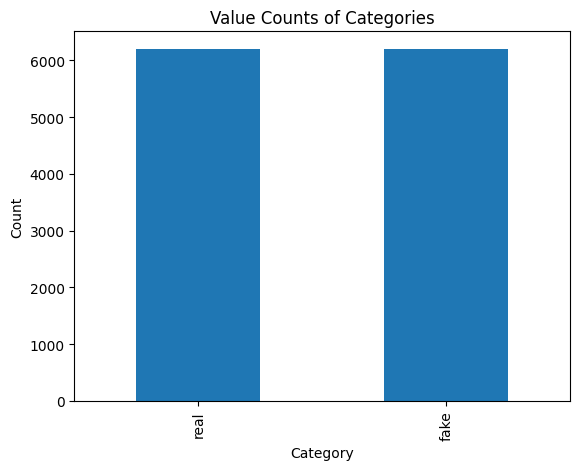

,count
label,
real,6200
fake,6200


In [ ]:
fake_real_count = df['label'].value_counts()
fake_real_count.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Value Counts of Categories')
plt.show()
fake_real_count

Since we now have balanced classes in our data, we can therefore confidently conclude that, when we train our model with this dataset, there is a high possibility that we will not see any biases that are caused by having non-balanced samples in our dataset. Doing this process also increases our chance of training a model that will give reliable results. This also makes the process simpler, as we will not have to resample or add weighting to our data later when we are in the process of training our model.

---

### Statistical Method 2 (Comparing Real vs Fake audio samples in different versions)

To have a better understanding of our dataset, we wanted to see if the balance between real and fake audio samples is similar across the two versions of data which are "norm" and "rerec". This is an important part for us to check because let's say for example, if one version has way more fake samples than real, there is a possibility that our model becomes biased and make poor predications.

We are going to use a 2-proportion z-test, which is a type of z-test that is specifically used to compare proportions, to test this. Our null hypothesis is that the proportion of fake audio samples and real audio samples is the same in both versions. Our alternative hypothesis is that either the proportion of fake audio samples or the proportion of real audio samples is larger than the other class in either of the version (norm or rerec). We have chosen 0.05 as our significance level which means if the P-value is less than 0.05, we will reject the null hypothesis. Since there are only two classes in our dataset (real or fake), we are going to test the proportion of fake audio samples out of all samples which will also reveal information about the proportion of real audio samples in the version column.

The 2-proportion z-test:

In [ ]:
cont_table = pd.crosstab(df['version'], df['label'])

fake_samples = cont_table['fake'].values
total_samples = cont_table.sum(axis=1).values

statistic, pvalue = proportions_ztest(count = fake_samples, nobs = total_samples)

print(f"The z-test statistic:{statistic: .2f}")
print(f"The P-value:{pvalue:}")

The z-test statistic: 20.10
The P-value:6.834461146358374e-90


As we can see from the above calculation, the z-test gave us a statistic of 20.10 and a p-value of 6.83e-90. Since the p-value is 6.83e-90 which is significantly lower than our significance level of 0.05, we reject the null hypothesis. This helps us to conclude that the proportion of fake and real audio samples is not the same between the norm and rerec versions. We need to be careful about this when training our model. If our model starts giving unreliable result, this is something we should check/fix.

Here's a plot that shows how real and fake audio samples are distributed across norm and rerec versions:

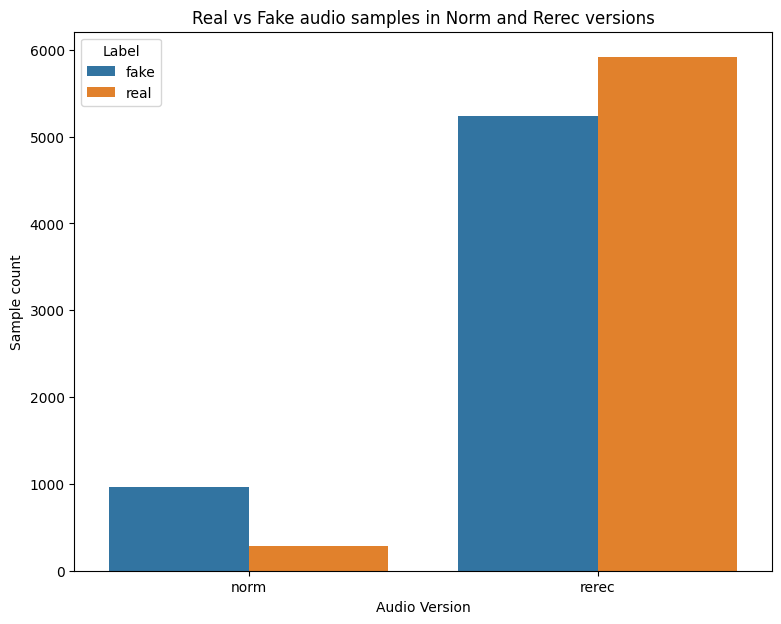

In [ ]:
data = df.groupby(['version', 'label']).size().reset_index(name = 'samples')

plt.figure(figsize=(9,7))
sns.barplot(data = data, x = 'version', y = 'samples', hue = 'label')
plt.title('Real vs Fake audio samples in Norm and Rerec versions')
plt.xlabel('Audio Version')
plt.ylabel('Sample count')
plt.legend(title = 'Label')

plt.show()

### Statistical Method 3 (Audio duration across data splits)

To make sure our model performs better, we want to check if the average duration of audio samples is similar or atleast close in the training, testing, and validation sets. This is important because if one set has much longer or shorter audios on average than other sets, it might affect how our model learns and performs.

We are going to use an ANOVA test, which is a statistical method for comparing the means of three or more groups. Even though we could just look at the average values to see any difference, we believe ANOVA testing will help us check if the differences we are going to see are statistically meaningful or if they just happened by chance. This will give our conclusion more confidence and strong support.

Our null hypothesis is that the average audio durations are similar or close across training, testing, and validation sets. Our alternative hypothesis is that at least one of the data splits has a different average audio duration compared to the others. Even though the test checks for any difference, we will also look at the actual values to see if the difference is big enough to matter. We have chosen 0.05 as our significance level which means if the P-value is less than 0.05, we will reject the null hypothesis.


The ANOVA test:

In [ ]:
train_data = df[df['type'] == 'training']['duration']
test_data = df[df['type'] == 'testing']['duration']
val_data = df[df['type'] == 'validation']['duration']

result = f_oneway(train_data, test_data, val_data)

print(f"The ANOVA test statistic:{result.statistic: .2f}")
print(f"The P-value:{result.pvalue: }")

The ANOVA test statistic: 137.32
The P-value: 1.0354307132125923e-59


From the above calculation, we can see that the ANOVA test gave us a statistic of 137.32 and a p-value of 1.04e-59. Since the p-value is 1.04e-59 which is significantly lower than our significance level of 0.05, we reject the null hypothesis. This means there is some statistical difference in average durations between the splits.

However, if we look at the actual average durations for each splits:

In [ ]:
averages = df.groupby('type')['duration'].mean()
averages

,duration
type,
testing,1.926223
training,1.967017
validation,1.970423


we can see that, the differences are very small. So, even though ANOVA test showed us that there is a difference, by observing the values in the above table, we can say that the differences are not big enough to worry about. We can now conclude that the average audio duration is practically the same across all three splits (testing, training, validation) and it should not affect our model performance.

Here's a boxplot that shows the audio duration distribution for training, testing and validation sets:

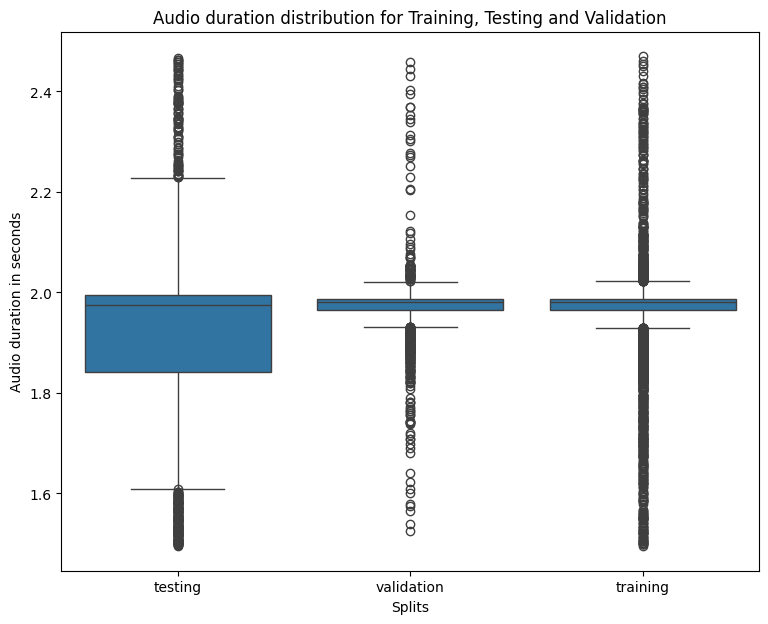

In [ ]:
plt.figure(figsize=(9,7))
sns.boxplot(data = df, x = 'type', y = 'duration')
plt.title('Audio duration distribution for Training, Testing and Validation')
plt.xlabel('Splits')
plt.ylabel('Audio duration in seconds')
plt.show()

### Statistical Method 4 (Balance Across Splits + Statistical Testing)
Having similar numbers of real and fake audio samples within each of the training, testing, and validation sets is very important for training a fair and effective machine learning model. If one class for example, fake audio, have significantly more samples in any one of these sets than other classes, the model might become biased and perform poorly when trying to detect the classes with smaller samples in that set. So, to make sure the model learns fairly from both classes, we need to confirm that real and fake samples are balanced in each data split. To do that, we are using a statistical test called the Chi-square test to check if the numbers of real and fake sampels are same or atleast close across the training, testing, and validation sets.

Our null hypothesis is that the distribution of real and fake audio samples is similar/close for all the three data splits. Our alternative hypothesis is that the distribution is significantly different in atleast one split. We have chosen 0.05 as our significance level which means if the P-value is less than 0.05, we will reject the null hypothesis.

The Chi-Square test:

In [ ]:
cont_table = pd.crosstab(df['type'], df['label'])

result = chi2_contingency(cont_table)

print(f"The Chi-square statistic:{result.statistic: .2f}")
print(f"The P-value:{result.pvalue:}")

The Chi-square statistic: 124.36
The P-value:9.905273641543375e-28


As we can see from the above calculation, the chi-square test gave us a statistic of 124.36 and a p-value of 9.91e-28. Since the p-value is 9.91e-28 which is significantly lower than our significance level of 0.05, we reject the null hypothesis.

This means that the class distribution is significantly differnt in atleast one split. From this table:

In [ ]:
print(cont_table)

label       fake  real
type                  
testing     1125   687
training    4162  4546
validation   913   967


We can see that, there is a large difference in the number of fake testing samples vs real testing samples even though the distribution is close for training and validation sets. To fix this, we can do oversampling to balance the number of real and fake samples in the testing set by duplicating samples from the smaller class which is the "real" class. We are doing oversampling to make sure we have the same number of real and fake audio samples for testing so that our machine learning model doesn't get biased toward the class with more data. Even though oversampling will increase the number of real audio samples in our dataset, it's not a problem because the classes are still nearly balanced, and the model will get to learn fairly from both.

Oversampling process:

In [ ]:
real_test_samples = df[(df['type'] == 'testing') & (df['label'] == 'real')]
fake_test_samples = df[(df['type'] == 'testing') & (df['label'] == 'fake')]

oversampling = resample(real_test_samples, replace=True, n_samples=len(fake_test_samples), random_state=42)

balanced_data = pd.concat([fake_test_samples, oversampling])

df = df[df['type'] != 'testing']
balanced_data['type'] = 'testing'
df = pd.concat([df, balanced_data])
preT_df = df

After the oversampling process, we run the chi-square test again:

In [ ]:
cont_table = pd.crosstab(df['type'], df['label'])

result = chi2_contingency(cont_table)

print(f"The Chi-square statistic:{result.statistic: .2f}")
print(f"The P-value:{result.pvalue:}")

The Chi-square statistic: 3.55
The P-value:0.16989615042231593


This time, the chi-square test has given us a statistic of 3.55 and a p-value of 0.17 (rounded value). Since the p-value is 0.17 which is higher than our significance level of 0.05, we fail to reject the null hypothesis. Now, we can confidently conclude that there is no significant difference in how real and fake audio samples are distributed across the splits. This balance is good because it will help the model learn from all parts of the data fairly and will give us reliable and unbiased predications.

Here's a plot that shows the distribution of real and fake audio samples in testing, training, and validation sets:

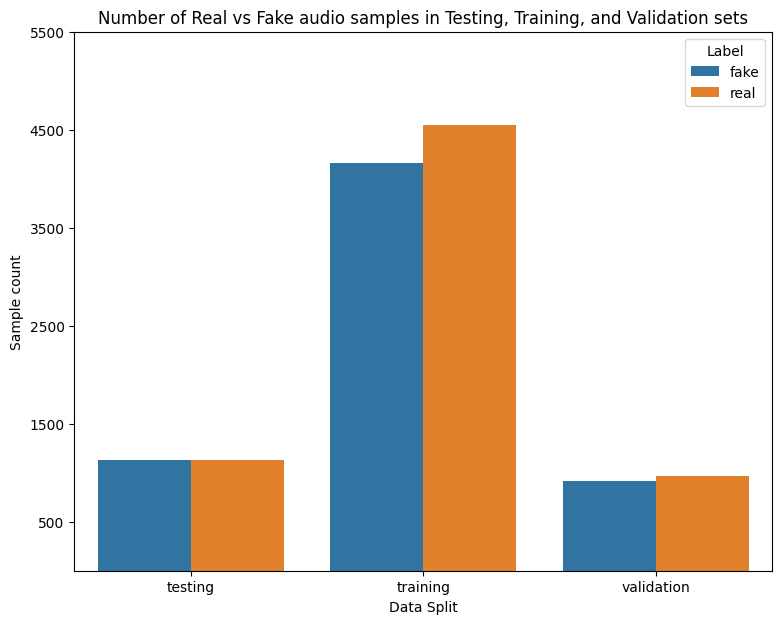

In [ ]:
data = df.groupby(['type', 'label']).size().reset_index(name = 'samples')

plt.figure(figsize=(9,7))
sns.barplot(data = data, x = 'type', y = 'samples', hue = 'label')
plt.title('Number of Real vs Fake audio samples in Testing, Training, and Validation sets')
plt.xlabel('Data Split')
plt.ylabel('Sample count')
plt.legend(title = 'Label')
plt.yticks(([500, 1500, 2500, 3500, 4500, 5500]))

plt.show()

## Primary analysis

To see if our model can understand raw sound well, we are going to use the AudioFlex library to extract important features from the .wav audio files. These features will turn the sounds into numbers that the model can learn from which can hopefully make it easier for the model to tell if an audio is real or fake.
<br>
For this part, we use this source [[link](https://python-forum.io/thread-39610.html)] to guide us through the process of extracting audio features using AudioFlux. Feel free to checkout the document if you would like to know more!


#### **IMPORTANT NOTE**:

This code is commented out as we saved the results to a csv file for faster processing, if you want to run these cells keep in mind they do take a lot of time to run.

In [ ]:
## Audio extracting (commented out because it takes two hours to load)
# Source used for this process: https://python-forum.io/thread-39610.html

# new_df = []
# df = df.reset_index(drop=True)

# for i in range(len(df)):

#   fp = df.loc[i, 'filepath']

#   audio_arr, sr = af.read(fp)

##  Makes sure each audio is just one simple sound instead of multiple parts mixed together.
#   if audio_arr.ndim > 1:
#     audio_arr = audio_arr.mean(axis=0)

#   mfcc_arr, _ = af.mfcc(audio_arr, cc_num=13, mel_num=128, radix2_exp=12, samplate=sr)

## Averaging the sound features to make it easier for the model to understand.
#   mean = np.mean(mfcc_arr, axis = 0)

#   new_df.append(mean)


# feature_df = pd.DataFrame(new_df)
# feature_df['label'] = df['label'].values
# display(feature_df)

In [ ]:
# feature_df.to_csv("audio_feature_data.csv", index=False)

In [ ]:
feature_df = pd.read_csv("/content/drive/MyDrive/CMSC320/Project/audio_feature_data.csv")
display(feature_df)

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,label
0,-0.901575,-1.186106,-1.131703,-0.998905,-0.962849,-0.933245,-1.016673,-0.761349,-0.619458,-0.813621,...,-0.824720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,real
1,-0.774488,-0.810431,-0.456802,-0.164665,-0.644523,-0.378936,-0.336048,-0.258827,-0.386551,-0.857959,...,-0.924257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,real
2,-0.497991,-0.332986,-0.821303,-0.815900,-0.521412,-0.497458,-0.619080,-0.775466,-0.734028,-0.315178,...,-0.388777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,real
3,0.446072,0.475993,-0.085349,-0.252628,-0.200366,-0.104206,-0.524367,-0.698690,-0.539363,-0.310560,...,0.320670,-0.308248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,real
4,-0.864122,-0.778645,-0.286008,-0.174499,-0.251394,-0.321015,-0.683072,-0.765276,-0.950501,-0.899018,...,0.169748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,real
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12833,-0.495207,-0.587529,-0.674242,-0.899004,-0.828126,-0.645509,-0.315012,-0.233870,-0.412336,-0.575851,...,-0.642346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,real
12834,-0.608910,-0.604384,-0.465677,-0.871605,-1.099417,-0.879988,-0.842286,-0.452787,-0.541077,-0.637457,...,-0.222225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,real
12835,-1.090872,-0.856924,-0.900573,-0.858924,-0.992528,-1.139245,-1.305043,-1.427437,-1.518269,-1.532306,...,-1.078647,-1.315749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,real
12836,-0.588398,-0.411206,-0.334780,-0.602401,-1.179298,-1.063581,-0.753213,-1.159584,-1.419072,-0.905227,...,-1.182243,-0.322827,-0.009264,NaN,NaN,NaN,NaN,NaN,NaN,real


After extracting audio features, by looking into the dataset, we noticed that some columns contain a large amount of NA or missing values. To take care of this, we set a threshold of 30% (ideal value) which means if a column has more than 30% of its data missing, that column will be droped as these types of columns will be less informative for our model. For the other columns that have fewer NA values, we used KNN imputation to fill in the missing values which uses mean value from nearest neighbors to impute. After that, we prepared our feature data by adding labels and types to them.

If you would like to know more about KNN imputation, see: https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html

In [ ]:
NA_thres = 0.4
feature_df = feature_df.drop(columns = feature_df.columns[feature_df.isna().sum() > NA_thres * len(feature_df)])

impute_feature_df = feature_df.drop(columns=['label'])
imputer = KNNImputer(n_neighbors=5)
df_array = imputer.fit_transform(impute_feature_df)

feature_df = pd.DataFrame(df_array, columns=impute_feature_df.columns)
feature_df['label'] = df['label'].values
feature_df['type'] = df['type'].values

display(feature_df)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,label,type
0,-0.901575,-1.186106,-1.131703,-0.998905,-0.962849,-0.933245,-1.016673,-0.761349,-0.619458,-0.813621,...,-0.845584,-0.576404,-0.472408,-0.495143,-0.734104,-0.695517,-0.945381,-0.824720,real,validation
1,-0.774488,-0.810431,-0.456802,-0.164665,-0.644523,-0.378936,-0.336048,-0.258827,-0.386551,-0.857959,...,-0.586889,-0.723410,-0.548338,-0.242788,-0.623927,-0.781931,-0.890307,-0.924257,real,validation
2,-0.497991,-0.332986,-0.821303,-0.815900,-0.521412,-0.497458,-0.619080,-0.775466,-0.734028,-0.315178,...,-0.286979,-0.160543,-0.406026,-0.445564,-0.661473,-0.609760,-0.173887,-0.388777,real,validation
3,0.446072,0.475993,-0.085349,-0.252628,-0.200366,-0.104206,-0.524367,-0.698690,-0.539363,-0.310560,...,-0.079442,-0.638305,-0.583780,0.089320,-0.185051,-0.011295,0.173777,0.320670,real,validation
4,-0.864122,-0.778645,-0.286008,-0.174499,-0.251394,-0.321015,-0.683072,-0.765276,-0.950501,-0.899018,...,-1.066717,-1.000876,-0.514158,-0.516448,-0.678787,-0.384258,-0.112758,0.169748,real,validation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12833,-0.495207,-0.587529,-0.674242,-0.899004,-0.828126,-0.645509,-0.315012,-0.233870,-0.412336,-0.575851,...,-0.689735,-0.876742,-0.691733,-0.772696,-0.782235,-0.813930,-0.752987,-0.642346,real,testing
12834,-0.608910,-0.604384,-0.465677,-0.871605,-1.099417,-0.879988,-0.842286,-0.452787,-0.541077,-0.637457,...,-1.064349,-0.826014,-0.904025,-0.592124,-0.387255,-0.628727,-0.683661,-0.222225,real,testing
12835,-1.090872,-0.856924,-0.900573,-0.858924,-0.992528,-1.139245,-1.305043,-1.427437,-1.518269,-1.532306,...,-0.734787,-1.013850,-1.156158,-1.145847,-0.908619,-0.903047,-1.109225,-1.078647,real,testing
12836,-0.588398,-0.411206,-0.334780,-0.602401,-1.179298,-1.063581,-0.753213,-1.159584,-1.419072,-0.905227,...,-0.997333,-1.461128,-1.454508,-0.804911,-1.132155,-1.522232,-1.529168,-1.182243,real,testing


###Visualization

This plot shows how the audio clips are spread out based on the two main features found by PCA. Each point represents one clip, and the color tells us if it's real or fake.

Source used: https://www.geeksforgeeks.org/machine-learning/implementing-pca-in-python-with-scikit-learn/

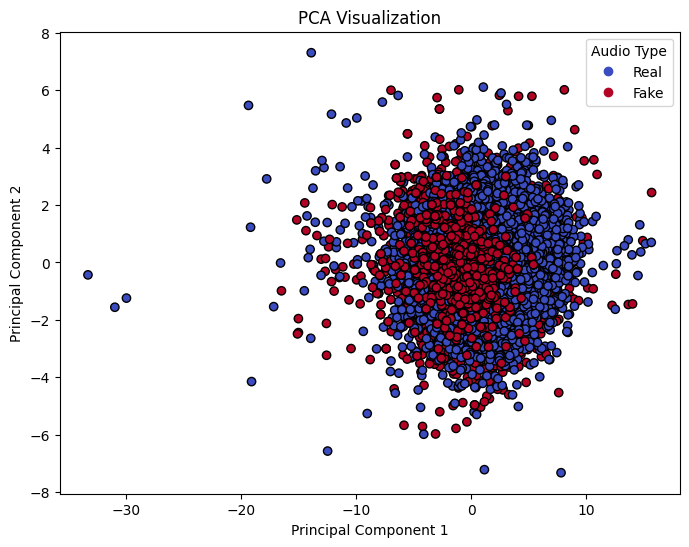

In [ ]:
X = feature_df.drop(columns =['label', 'type'])
y = feature_df['label'].map({'fake': 0, 'real': 1})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
pca_plot = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization")
plt.legend(handles= pca_plot.legend_elements()[0], labels =['Real', 'Fake'], title= 'Audio Type')
plt.show()

### Training and Testing

For this part of the project, we are now going to train the training data using four different machine learning models: Logistic Regression, Random Forest, Decision Tree, and K-Nearest Neighbors, to see which one performs the best at predicting whether an audio clip is real or fake. Here, we used KFold and cross-validation, which means we split the data into smaller parts and tested the model on different parts each time. This helps make sure that the results are fair and not just lucky on one part of the data.


In [ ]:
training_data = feature_df[feature_df['type'] == 'training']
validation_data = feature_df[feature_df['type'] == 'validation']
testing_data = feature_df[feature_df['type'] == 'testing']


X_train = training_data.drop(columns = ['label', 'type'])
X_valid = validation_data.drop(columns = ['label', 'type'])
X_test = testing_data.drop(columns = ['label', 'type'])
y_train = training_data['label']
y_valid = validation_data['label']
y_test = testing_data['label']


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_valid_scaled = scaler.transform(X_valid)


# StratifiedKFold and cross_val_score require numeric labels, so we encode string labels real and fake into 0 and 1
l_Enc = LabelEncoder()
enc_label = l_Enc.fit_transform(training_data['label'])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

model_lr = LogisticRegression(max_iter=1000)
lr_score = cross_val_score(model_lr, X_train_scaled, enc_label, cv = skf)

print("Model: Logistic Regression")
print(f"Cross-validated Accuracy: {lr_score.mean()} (+/- {np.std(lr_score)})")

model_rf = RandomForestClassifier()
rf_score = cross_val_score(model_rf, X_train_scaled, enc_label, cv = skf)

print("Model: Random Forest")
print(f"Cross-validated Accuracy: {rf_score.mean()} (+/- {np.std(rf_score)})")

model_dt = DecisionTreeClassifier(random_state=42)
dt_score = cross_val_score(model_dt, X_train_scaled, enc_label, cv = skf)

print("Model: Decision Tree")
print(f"Cross-validated Accuracy: {dt_score.mean()} (+/- {np.std(dt_score)})")

model_knn = KNeighborsClassifier(n_neighbors=5)
knn_score = cross_val_score(model_knn, X_train_scaled, enc_label, cv = skf)

print("Model: K-Nearest Neighbors")
print(f"Cross-validated Accuracy: {knn_score.mean()} (+/- {np.std(knn_score)})")

Model: Logistic Regression
Cross-validated Accuracy: 0.6446936879249755 (+/- 0.005705370803752281)
Model: Random Forest
Cross-validated Accuracy: 0.6637556704613724 (+/- 0.0074667942789641275)
Model: Decision Tree
Cross-validated Accuracy: 0.5625855391447305 (+/- 0.01192265626750249)
Model: K-Nearest Neighbors
Cross-validated Accuracy: 0.6180548017654843 (+/- 0.010805462617403555)


From the above results, we can see that these results are better than just random guessing but they are not very high which indicates we got more work to do. For example, since Random Forest model gave us the best accuracy for training data, if we try to do a classification problem on the testing and validation data using RandomForestClassifier, we can see that,


In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

validation_pred = model.predict(X_valid)
testing_pred = model.predict(X_test)

acc_score_validation = accuracy_score(y_valid, validation_pred)
acc_score_testing = accuracy_score(y_test, testing_pred)

print("Validation Acc: ", acc_score_validation)
print("Testing Acc: ", acc_score_testing)

Validation Acc:  0.6569148936170213
Testing Acc:  0.6195555555555555


It gives us about 65.7% accuracy on the validation samples and around 62% on the test samples which implies that model like Random Forest would not be the best choice to do training/testing for audio data. One other reason why percentages are not high could be that the features we extracted from all the audios are not capturing enough crucial information which is why our models are struggling to clearly tell apart real and fake audio. That’s why, now we are going to use CNN or Convolutional Neural Network to see if we can increase our testing accuracy.


##Convolutional Neural Network (CNN):

Now, we will try another model which is the Convolutional Neural Network (CNN). A CNN is a deep learning model that is designed in order to process data that is grid like which includes images. Images analyzed by CNN is structured in a matrix of different pixels, the way the model works is that it preserve the spatial structure of those pixels and learn from their features such as edges shapes and objects. To do this with audio, we will first convert every .wav file sample into a spectogram, and make the CNN learn the different pattersn between real and fake spectograms.

The following "wav_file_to_spectogram" funciton takes in the path file from our dataframe along with its associated sam,pling rate, duration and other parameters used to turn it into a spectogram. The funtion first uses librosa's load method which loads an audio file as floating point time series. These time series will then be used in order to create a mel-scaled spectogram. Mel scale an male bands are basicaly a scale of pitches that is used to show how humans precieve sound, mel bands are used to represent such pitches and are equally spaced out onto the mel scale itslef. Soon after, we normalize and log scae the output in order to remove any discrepancies in that data due to how they are being collected; we are removing non important data so the classification model is more accurate.

#### **IMPORTANT NOTE**:

Some code is commented out as we saved the results to a local drive file for faster processing, if you want to run these cells keep in mind they do take a lot of time to run.

In [ ]:
# def wav_file_to_spectogram(file_path, sampling_rate, duration, mel_bands, size, length):
#   y, sr = librosa.load(file_path, sr= sampling_rate, duration= duration)

#   if len(y) < length:
#     y = np.pad(y,0, length - len(y))
#   else:
#     y = y[:length]

#   S = librosa.feature.melspectrogram(y= y, sr=sr, n_mels=mel_bands)

#   log_scale_S = librosa.power_to_db(S, ref = np.max)

#   normalized_S_num = (log_scale_S - log_scale_S.min() )
#   normalized_S_deno = (log_scale_S.max() - log_scale_S.min())
#   normalized_S = normalized_S_num / normalized_S_deno

#   image = cv2.resize(normalized_S, size)

#   return image


Here we are looping through every row in our data frame and converting it into the spectogram and assigning each to its specific array (train, test, valid) based on the label its assigned to in our dataframe

In [ ]:
# train_mel_specs, train_labels = [], []
# valid_mel_specs, valid_labels = [], []
# test_mel_specs, test_labels = [], []

# for row in df.itertuples(index=False):
#   curr_mel_spec = wav_file_to_spectogram(row.filepath, row.samplerate, row.duration, 128, (128, 128), int(row.samplerate * row.duration))

#   if row.type == "training":
#     train_mel_specs.append(curr_mel_spec)
#     train_labels.append(row.label_id)
#   elif row.type == "testing":
#     test_mel_specs.append(curr_mel_spec)
#     test_labels.append(row.label_id)
#   else:
#     valid_mel_specs.append(curr_mel_spec)
#     valid_labels.append(row.label_id)


# X_train = np.stack(train_mel_specs, axis=0)[..., np.newaxis]
# y_train = np.array(train_labels)

# X_valid = np.stack(valid_mel_specs, axis=0)[..., np.newaxis]
# y_valid = np.array(valid_labels)

# X_test = np.stack(test_mel_specs, axis=0)[..., np.newaxis]
# y_test = np.array(test_labels)

In [ ]:
# np.save('/content/drive/MyDrive/CMSC320/Project/CNN_X_train.npy', X_train)
# np.save('/content/drive/MyDrive/CMSC320/Project/CNN_y_train.npy', y_train)
# np.save('/content/drive/MyDrive/CMSC320/Project/CNN_X_valid.npy', X_valid)
# np.save('/content/drive/MyDrive/CMSC320/Project/CNN_y_valid.npy', y_valid)
# np.save('/content/drive/MyDrive/CMSC320/Project/CNN_X_test.npy', X_test)
# np.save('/content/drive/MyDrive/CMSC320/Project/CNN_y_test.npy', y_test)

X_train = np.load('/content/drive/MyDrive/CMSC320/Project/CNN_X_train.npy')
y_train = np.load('/content/drive/MyDrive/CMSC320/Project/CNN_y_train.npy')
X_valid = np.load('/content/drive/MyDrive/CMSC320/Project/CNN_X_valid.npy')
y_valid = np.load('/content/drive/MyDrive/CMSC320/Project/CNN_y_valid.npy')
X_test = np.load('/content/drive/MyDrive/CMSC320/Project/CNN_X_test.npy')
y_test = np.load('/content/drive/MyDrive/CMSC320/Project/CNN_y_test.npy')


Now comes our CNN model, this model consists of 4 different blocks that consist of a convolutional layer (to extract features of the spectogram), batch the normalization (to accelerate the CNN), ReLU activation function (increase preformance and training), and a max pooling kernal which essentialy reduces the dimensions of the image by dividing it into seperate rectangles with a size of 2 and then getting the max in the scope it is on.

We have used this youtube video [Link: https://www.youtube.com/watch?v=SQ1iIKs190Q] as our resource. Click the link if you are interested!

In [ ]:
class ConvNetModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels = 1,
                out_channels = 16,
                kernel_size = 3,
                stride =1,
                padding = 1
            ),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(
                in_channels = 16,
                out_channels = 32,
                kernel_size = 3,
                stride =1,
                padding = 1
            ),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(
                in_channels = 32,
                out_channels = 64,
                kernel_size = 3,
                stride =1,
                padding = 1
            ),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(
                in_channels = 64,
                out_channels = 128,
                kernel_size = 3,
                stride =1,
                padding = 1
            ),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )
        self.adaptive_pool = nn.AdaptiveAvgPool2d((1, 1))

        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(128,  256)
        self.fc2 = nn.Linear(256, 1)

    def forward(self, input):
      x = self.conv1(input)
      x = self.conv2(x)
      x = self.conv3(x)
      x = self.conv4(x)
      x = self.adaptive_pool(x)
      x = x.view(x.size(0), -1)
      x = self.dropout(F.relu(self.fc1(x)))
      x = self.fc2(x)

      return x

model = ConvNetModel()

Now we will be storing the data into pytorch tensors. Basically, images are stormed in the common format as height,widthm, channels (RGB, Greyscale). However in the pytortch library the channel itself is expected to be before the width and the height so the following uses .permute() to change the order so the channel is at the begining before both dimensions. The same thing is done for the labels of our data (real, fake) where they are convertred into floats so they match the required format from our numbers, once this data is conerted they are grouped into a TensorDataset which ultimately paris the label with the associated image. Finally, we utilize a DartaLoader with a batch size of 32 in order to organize all our data into different batches so the model can train small groups of images together, this also allows us to shuffel the data so the model is not prone to memorization and overfitting.

In [ ]:
scaler = StandardScaler()

X_train_tensor = torch.tensor(X_train, dtype= torch.float32).permute(0, 3, 1,2)
X_valid_tensor = torch.tensor(X_valid, dtype= torch.float32).permute(0, 3, 1, 2)
X_test_tensor = torch.tensor(X_test, dtype= torch.float32).permute(0, 3, 1, 2)
y_train_tensor = torch.tensor(y_train, dtype= torch.float32)
y_valid_tensor = torch.tensor(y_valid, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype= torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
valid_dataset = TensorDataset(X_valid_tensor, y_valid_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

Here is where the model learns, at the begining both the optimizer and the loss function that will be used is created. The loss function used is BCEWithLogitsLoss which is used becuase it offers a more efficient way to comput binary classificaiton patterns and is more popular in machine learning than other functions. The loss function also tilizes Sigmoid function which is optimal in our case. The optimizer in this case is called "Adam" which is used in order to improve the model learning rate. The epoch or the rounds the model runs represent the amount of times the model will go through the whole data set which is set to 30 here. In each loop the model makes a predicition, then checks the prediciotion and how accurate it is and after that creates small changes to improve its next predicition.

In [ ]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
losses = []
epochs = 20
for epoch in range(epochs):
  running_loss = 0.0
  model.train()
  for batch_idx, (data, targets) in enumerate(train_loader, 0):
    optimizer.zero_grad()
    outputs = model(data).squeeze(1)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  losses.append(running_loss / len(train_loader))
  print(f"Epoch {epoch+1}/{epochs} - Loss: {running_loss/len(train_loader):.4f}")

print('Training Done')

Epoch 1/20 - Loss: 0.3525
Epoch 2/20 - Loss: 0.1626
Epoch 3/20 - Loss: 0.1179
Epoch 4/20 - Loss: 0.0941
Epoch 5/20 - Loss: 0.1102
Epoch 6/20 - Loss: 0.0588
Epoch 7/20 - Loss: 0.0629
Epoch 8/20 - Loss: 0.0530
Epoch 9/20 - Loss: 0.0498
Epoch 10/20 - Loss: 0.0392
Epoch 11/20 - Loss: 0.0371
Epoch 12/20 - Loss: 0.0377
Epoch 13/20 - Loss: 0.0302
Epoch 14/20 - Loss: 0.0420
Epoch 15/20 - Loss: 0.0253
Epoch 16/20 - Loss: 0.0287
Epoch 17/20 - Loss: 0.0418
Epoch 18/20 - Loss: 0.0155
Epoch 19/20 - Loss: 0.0260
Epoch 20/20 - Loss: 0.0408
Training Done


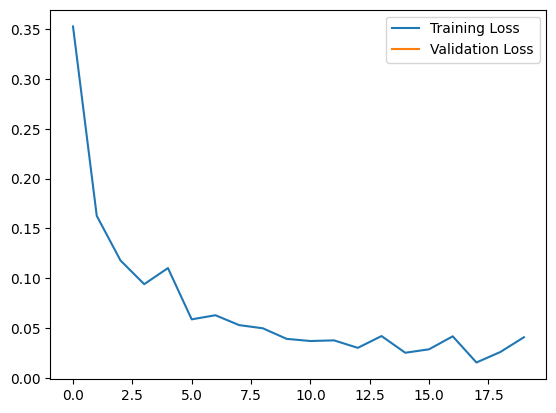

In [ ]:
validation_losses = []

model.eval()
validation_running_loss = 0.0
for data, targets in valid_loader:
  outputs = model(data).view(-1)
  validation_loss = criterion(outputs, targets)
  validation_running_loss += validation_loss.item()

validation_loss = validation_running_loss / len(valid_loader)
validation_losses.append(validation_loss)

plt.plot(losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.legend()

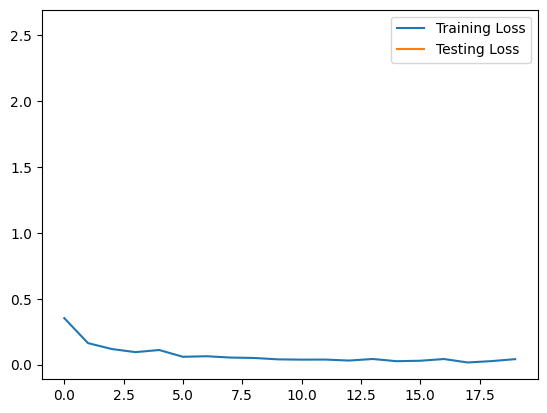

In [ ]:
testing_losses = []

model.eval()
testing_running_loss = 0.0
for data, targets in test_loader:
  outputs = model(data).view(-1)
  testing_loss = criterion(outputs, targets)
  testing_running_loss += testing_loss.item()

testing_loss = testing_running_loss / len(valid_loader)
testing_losses.append(testing_loss)

plt.plot(losses, label='Training Loss')
plt.plot(testing_losses, label='Testing Loss')
plt.legend()

In [ ]:
from sklearn.metrics import classification_report
classification_labels, classification_predictions = [], []

for data, targets in test_loader:
  pred = (torch.sigmoid(model(data)) > 0.4)
  classification_labels.extend(targets)
  classification_predictions.extend(pred)

y_original = np.array(classification_labels).flatten()
y_pred = np.array(classification_predictions).flatten()

print(classification_report(y_original, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.43      0.55      1125
         1.0       0.60      0.88      0.72      1125

    accuracy                           0.65      2250
   macro avg       0.69      0.65      0.63      2250
weighted avg       0.69      0.65      0.63      2250



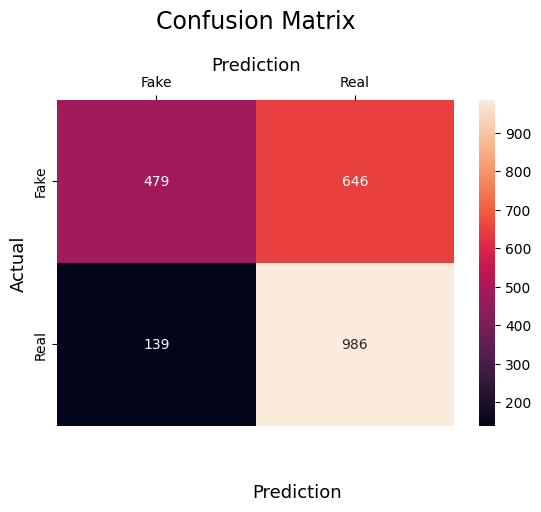

In [ ]:
cm = confusion_matrix(y_original, y_pred)
sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Fake','Real'], yticklabels=['Fake','Real'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

From the above calculation of training loss, we can see that even though we were able to achieve very low training loss, the final test accuracy of 65% tells us that we have a problem with our model. Our model has an overfitting problem, which means it performs very well on the training data but struggles to generalize to new, unseen data. This happens when the model learns patterns from the training data that are too specific, including noise or details that don't matter. The above confusion matrix plot also visualizes this issue; although the model is able to correctly classify a good number of samples from both classes, it still makes a significant number of incorrect predictions.  
To fix the issue of overfitting, we are going to now try to use an multilayer perceptron network (MLP)

## Multilayer Perceptron Network (MLP)

Circling back to our first step we first need to extract some important features of the audio itself, to do this we will be using the Librosa library once again. As done before, we first load the wav file with its associated sampling rate and duration, however unlike before we will not be turning it to an image instead we will extract some features from it. The first feature is the chromagram stft which is a feature for the pitch, it bascially analzyes what notes are played over time. The second is the root mean square energy which analyzes how loud the sound is aross the clip, then is the center of mass for the sound frequency, the higher the number the higher the pitch. After that is the spectral rolloff which says where is most of the energy of the sound lies and then the zero crossing rate which is used to count how many signal changes happen. Finally is the mfcc which is the most common feature and is able to capture the text and timbre (tone) of the audio. After all these features are analyzed they are combined into one feature vector which is what the horizontal stack for np is used for, that hstack is what is being read to our model. For all cells that follow, similar steps are being done to the CNN model.

#### **IMPORTANT NOTE**:

Some code is commented out as we saved the results to a local drive file for faster processing, if you want to run these cells keep in mind they do take a lot of time to run.

In [ ]:
# def improved_feature_extraction(file_path, sampling_rate, duration):
#   y, sr = librosa.load(file_path, sr= sampling_rate, duration= duration)
#   chromagram_stft = np.mean(librosa.feature.chroma_stft(y=y, sr=sr))
#   root_mean_square = np.mean(librosa.feature.rms(y=y))
#   cent = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
#   rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
#   zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y))
#   mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr), axis=1)

#   return np.hstack([chromagram_stft, root_mean_square, cent, rolloff, zero_crossing_rate, mfcc])

In [ ]:
# train_mel_specs, train_labels = [], []
# valid_mel_specs, valid_labels = [], []
# test_mel_specs, test_labels = [], []

# def feature_extract_row(row):
#   feature = improved_feature_extraction(row.filepath, row.samplerate, row.duration)
#   return (row.type, feature, row.label_id)

# rows = list(df.itertuples(index=False))

# for row in df.itertuples(index=False):
#   curr_mel_spec = improved_feature_extraction(row.filepath, row.samplerate, row.duration)
#   if row.type == "training":
#     train_mel_specs.append(curr_mel_spec)
#     train_labels.append(row.label_id)
#   elif row.type == "testing":
#     test_mel_specs.append(curr_mel_spec)
#     test_labels.append(row.label_id)
#   else:
#     valid_mel_specs.append(curr_mel_spec)
#     valid_labels.append(row.label_id)


In [ ]:
# X_train = np.stack(train_mel_specs)
# y_train = np.array(train_labels)

# X_valid = np.stack(valid_mel_specs)
# y_valid = np.array(valid_labels)

# X_test = np.stack(test_mel_specs)
# y_test = np.array(test_labels)

# np.save('/content/drive/MyDrive/CMSC320/Project/X_train.npy', X_train)
# np.save('/content/drive/MyDrive/CMSC320/Project/y_train.npy', y_train)
# np.save('/content/drive/MyDrive/CMSC320/Project/X_valid.npy', X_valid)
# np.save('/content/drive/MyDrive/CMSC320/Project/y_valid.npy', y_valid)
# np.save('/content/drive/MyDrive/CMSC320/Project/X_test.npy', X_test)
# np.save('/content/drive/MyDrive/CMSC320/Project/y_test.npy', y_test)

X_train = np.load('/content/drive/MyDrive/CMSC320/Project/X_train.npy')
y_train = np.load('/content/drive/MyDrive/CMSC320/Project/y_train.npy')
X_valid = np.load('/content/drive/MyDrive/CMSC320/Project/X_valid.npy')
y_valid = np.load('/content/drive/MyDrive/CMSC320/Project/y_valid.npy')
X_test = np.load('/content/drive/MyDrive/CMSC320/Project/X_test.npy')
y_test = np.load('/content/drive/MyDrive/CMSC320/Project/y_test.npy')


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_valid_scaled = scaler.transform(X_valid)

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_valid_tensor = torch.tensor(X_valid_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_valid_tensor = torch.tensor(y_valid, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
valid_dataset = TensorDataset(X_valid_tensor, y_valid_tensor)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
class MLPModel(nn.Module):
    def __init__(self, feat_dim):
      super().__init__()
      self.fc1 = nn.Linear(feat_dim, 128)
      self.bn1 = nn.BatchNorm1d(128)
      self.dropout1 = nn.Dropout(0.3)
      self.fc2 = nn.Linear(128, 64)
      self.bn2 = nn.BatchNorm1d(64)
      self.dropout2 = nn.Dropout(0.3)
      self.fc3 = nn.Linear(64, 32)
      self.bn3 = nn.BatchNorm1d(32)
      self.dropout3 = nn.Dropout(0.2)
      self.fc4 = nn.Linear(32, 1)

    def forward(self, x):
      x = F.relu(self.bn1(self.fc1(x)))
      x = self.dropout1(x)
      x = F.relu(self.bn2(self.fc2(x)))
      x = self.dropout2(x)
      x = F.relu(self.bn3(self.fc3(x)))
      x = self.dropout3(x)
      x = self.fc4(x)
      return x

model = MLPModel(X_train.shape[1])

In [ ]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
epochs = 50
losses = []

for epoch in range(epochs):
  model.train()
  running_loss = 0.0

  for data, targets in train_loader:
    pred = model(data).view(-1)
    loss = criterion(pred, targets)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

  losses.append(running_loss / len(train_loader))
  print(f"Epoch {epoch+1} - Loss: {running_loss/len(train_loader):.4f}")

Epoch 1 - Loss: 0.6137
Epoch 2 - Loss: 0.5063
Epoch 3 - Loss: 0.4362
Epoch 4 - Loss: 0.3926
Epoch 5 - Loss: 0.3536
Epoch 6 - Loss: 0.3315
Epoch 7 - Loss: 0.3064
Epoch 8 - Loss: 0.2866
Epoch 9 - Loss: 0.2748
Epoch 10 - Loss: 0.2582
Epoch 11 - Loss: 0.2555
Epoch 12 - Loss: 0.2358
Epoch 13 - Loss: 0.2399
Epoch 14 - Loss: 0.2323
Epoch 15 - Loss: 0.2306
Epoch 16 - Loss: 0.2144
Epoch 17 - Loss: 0.2186
Epoch 18 - Loss: 0.2076
Epoch 19 - Loss: 0.2079
Epoch 20 - Loss: 0.2046
Epoch 21 - Loss: 0.2056
Epoch 22 - Loss: 0.1940
Epoch 23 - Loss: 0.1898
Epoch 24 - Loss: 0.1867
Epoch 25 - Loss: 0.1880
Epoch 26 - Loss: 0.1825
Epoch 27 - Loss: 0.1781
Epoch 28 - Loss: 0.1824
Epoch 29 - Loss: 0.1790
Epoch 30 - Loss: 0.1722
Epoch 31 - Loss: 0.1685
Epoch 32 - Loss: 0.1706
Epoch 33 - Loss: 0.1665
Epoch 34 - Loss: 0.1596
Epoch 35 - Loss: 0.1604
Epoch 36 - Loss: 0.1614
Epoch 37 - Loss: 0.1481
Epoch 38 - Loss: 0.1567
Epoch 39 - Loss: 0.1498
Epoch 40 - Loss: 0.1529
Epoch 41 - Loss: 0.1488
Epoch 42 - Loss: 0.1456
E

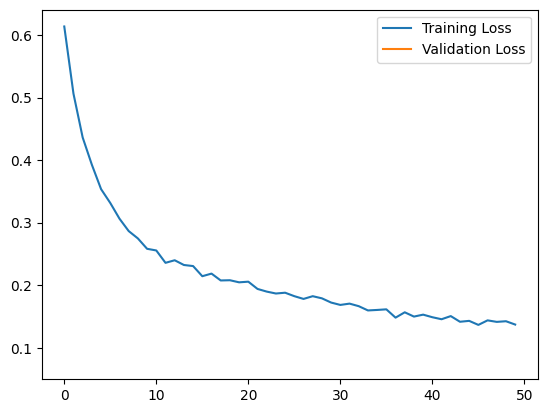

In [ ]:
validation_losses = []

model.eval()
validation_running_loss = 0.0
for data, targets in valid_loader:
  outputs = model(data).view(-1)
  validation_loss = criterion(outputs, targets)
  validation_running_loss += validation_loss.item()

validation_loss = validation_running_loss / len(valid_loader)
validation_losses.append(validation_loss)

plt.plot(losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.legend()

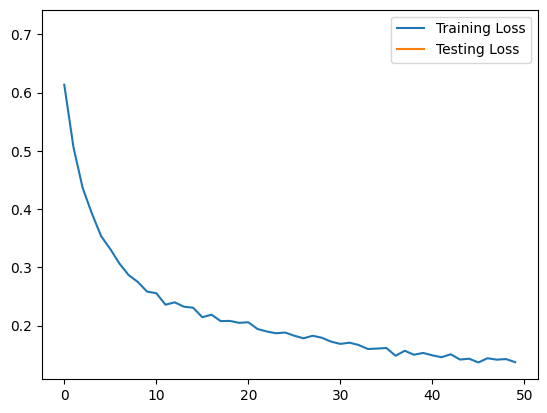

In [ ]:
testing_losses = []

model.eval()
testing_running_loss = 0.0
for data, targets in test_loader:
  outputs = model(data).view(-1)
  testing_loss = criterion(outputs, targets)
  testing_running_loss += testing_loss.item()

testing_loss = testing_running_loss / len(valid_loader)
testing_losses.append(testing_loss)

plt.plot(losses, label='Training Loss')
plt.plot(testing_losses, label='Testing Loss')
plt.legend()

In [ ]:
classification_labels, classification_predictions = [], []

for data, targets in test_loader:
  pred = (torch.sigmoid(model(data)) > 0.4)
  classification_labels.extend(targets)
  classification_predictions.extend(pred)

y_original = np.array(classification_labels).flatten()
y_pred = np.array(classification_predictions).flatten()

print(classification_report(y_original, y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.71      0.72      1125
         1.0       0.72      0.75      0.74      1125

    accuracy                           0.73      2250
   macro avg       0.73      0.73      0.73      2250
weighted avg       0.73      0.73      0.73      2250



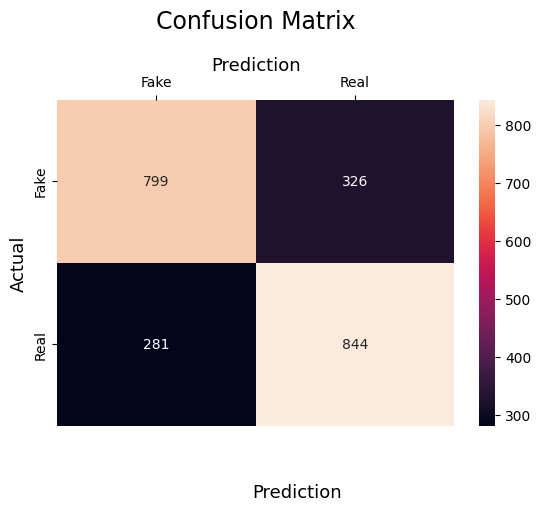

In [ ]:
cm = confusion_matrix(y_original, y_pred)
sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Fake','Real'], yticklabels=['Fake','Real'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

The Multilayer Perceptron (MLP) model did a good job at telling apart real and fake audio. Based on the classification report, it had an accuracy of 73%, which means it got most predictions right. The precision, recall, and F1-scores for both classes, real and fake, were also fairly balanced which shows that the model works well for both types. The heatmap of the confusion matrix makes this even clearer for us by showing us strong numbers in the correct prediction boxes, which are top left box and bottom right box, and fewer mistakes in the wrong ones. Overall, the performance of our MLP model is much better than other neural network and machine learning models we used so far.    


## Transfer learning

To see if we can improve our model's accuracy more, we are now going to use a powerful technique of machine learning called "transfer learning" by using a pre-trained model called Cnn14 through the PANNs Inference tool. This model was already trained on a huge audio dataset, this means it knows how to understand important patterns in sounds. Now, we are going to use this pre-trained model to extract important features of our audios. We got this pre-trained model from the PANNs GitHub page by qiuqiangkong, which is made for audio tagging tasks and works really well for analyzing sound. Our goal for this part is to show how transfer learning works.

Resources used:

1) https://github.com/qiuqiangkong/audioset_tagging_cnn

2) https://github.com/qiuqiangkong/panns_inference

In [ ]:
## This part is commented out as it takes a long time to process. (Took me 4 hours)

# preT_df = preT_df.reset_index(drop=True)


# # initializing model
# model = AudioTagging(checkpoint_path=None)


# # process extract embedding
# def embedding_process(audio_path, sr=32000):
#   # loading audio
#   waveform, _ = librosa.load(audio_path, sr=sr, mono=True)

#   waveform = waveform[None, :]    # (1, audio_length)

#   clipwise_output, embedding_batch = model.inference(waveform)

#   embedding = embedding_batch[0]

#   return embedding


# # Extracting all embeddings
# combine_emb = []
# for i in range(len(preT_df)):
#     audio_path = preT_df.loc[i, "filepath"]
#     emb = embedding_process(audio_path)
#     combine_emb.append(emb)


# # Create new DataFrame with embeddings
# emb_df = pd.DataFrame(combine_emb)
# emb_df["label"] = preT_df["label"].values
# emb_df["type"] = preT_df["type"].values


In [ ]:
# emb_df["label_id"] = preT_df["label_id"].values
# emb_df.to_csv("embedding_data.csv", index=False)

In [ ]:
csv_file = "/content/drive/MyDrive/CMSC320/Project/embedding_data.csv"
df = pd.read_csv(csv_file)
df.reset_index(drop=True, inplace=True)
display(df)

,0,1,2,3,4,5,6,7,8,9,...,2041,2042,2043,2044,2045,2046,2047,label,type,label_id
0,0.0,0.0,0.0,0.0,0.0,0.204342,0.0,0.052306,0.0,0.0,...,0.0,0.0,0.000000,0.420760,0.505041,0.672317,0.0,real,validation,1
1,0.0,0.0,0.0,0.0,0.0,0.277614,0.0,0.008162,0.0,0.0,...,0.0,0.0,0.000000,0.271785,0.586917,0.671434,0.0,real,validation,1
2,0.0,0.0,0.0,0.0,0.0,0.190697,0.0,0.001104,0.0,0.0,...,0.0,0.0,0.000000,0.398209,0.445093,0.663972,0.0,real,validation,1
3,0.0,0.0,0.0,0.0,0.0,0.146511,0.0,0.024956,0.0,0.0,...,0.0,0.0,0.000000,0.428682,0.552341,0.747716,0.0,real,validation,1
4,0.0,0.0,0.0,0.0,0.0,0.161971,0.0,0.043346,0.0,0.0,...,0.0,0.0,0.000000,0.450261,0.399162,0.851934,0.0,real,validation,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12833,0.0,0.0,0.0,0.0,0.0,0.182665,0.0,0.034071,0.0,0.0,...,0.0,0.0,0.000000,0.379879,0.366669,0.590144,0.0,real,testing,1
12834,0.0,0.0,0.0,0.0,0.0,0.146624,0.0,0.040001,0.0,0.0,...,0.0,0.0,0.000000,0.473268,0.407433,0.735505,0.0,real,testing,1
12835,0.0,0.0,0.0,0.0,0.0,0.429475,0.0,0.039519,0.0,0.0,...,0.0,0.0,0.000000,0.380589,0.449552,0.564263,0.0,real,testing,1
12836,0.0,0.0,0.0,0.0,0.0,0.249393,0.0,0.006111,0.0,0.0,...,0.0,0.0,0.020892,0.243253,0.468496,0.578043,0.0,real,testing,1


In [ ]:
constant_cols = df.columns[df.nunique() == 1]
df = df.drop(columns=constant_cols)

In [ ]:
# # 1. Split features and labels
# X = emb_df.drop(columns=['label', 'type', 'label_id'])   # features (embedding columns)
# y = emb_df['label_id']                          # labels (real/fake)

# # 2. Train-test split (you can also stratify to keep class balance)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # 3. Train Random Forest
# clf = RandomForestClassifier(random_state=42)
# clf.fit(X_train, y_train)

# # 4. Predict and check accuracy
# y_pred = clf.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)

# print(f"Test Accuracy: {accuracy * 100:.2f}%")

In [ ]:
training_data = df[df['type'] == 'training']
validation_data = df[df['type'] == 'validation']
testing_data = df[df['type'] == 'testing']


X_train = training_data.drop(columns = ['label', 'type', 'label_id'])
X_valid = validation_data.drop(columns = ['label', 'type', 'label_id'])
X_test = testing_data.drop(columns = ['label', 'type', 'label_id'])
y_train = training_data['label_id']
y_valid = validation_data['label_id']
y_test = testing_data['label_id']


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_valid_scaled = scaler.transform(X_valid)

In [ ]:
label = training_data['label_id']

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

model_lr = LogisticRegression(max_iter=1000)
lr_score = cross_val_score(model_lr, X_train_scaled, label, cv = skf)

print("Model: Logistic Regression")
print(f"Cross-validated Accuracy: {lr_score.mean()} (+/- {np.std(lr_score)})")

model_rf = RandomForestClassifier()
rf_score = cross_val_score(model_rf, X_train_scaled, label, cv = skf)

print("Model: Random Forest")
print(f"Cross-validated Accuracy: {rf_score.mean()} (+/- {np.std(rf_score)})")

model_dt = DecisionTreeClassifier(random_state=42)
dt_score = cross_val_score(model_dt, X_train_scaled, label, cv = skf)

print("Model: Decision Tree")
print(f"Cross-validated Accuracy: {dt_score.mean()} (+/- {np.std(dt_score)})")

model_knn = KNeighborsClassifier(n_neighbors=5)
knn_score = cross_val_score(model_knn, X_train_scaled, label, cv = skf)

print("Model: K-Nearest Neighbors")
print(f"Cross-validated Accuracy: {knn_score.mean()} (+/- {np.std(knn_score)})")

Model: Logistic Regression
Cross-validated Accuracy: 0.8990587644114953 (+/- 0.007084998721723419)
Model: Random Forest
Cross-validated Accuracy: 0.8839002750573559 (+/- 0.004646203206355556)
Model: Decision Tree
Cross-validated Accuracy: 0.7916847741146695 (+/- 0.011070787513926768)
Model: K-Nearest Neighbors
Cross-validated Accuracy: 0.8534662436503032 (+/- 0.01246619061457277)


In [ ]:
model = LogisticRegression(max_iter =1000, random_state =42)
model.fit(X_train_scaled, y_train)

y_valid_pred = model.predict(X_valid_scaled)
accuracy_valid_logistic = accuracy_score(y_valid, y_valid_pred)

y_test_pred = model.predict(X_test_scaled)
accuracy_test_logistic = accuracy_score(y_test, y_test_pred)

print("Validation Acc: ", accuracy_valid_logistic)
print("Testing Acc: ", accuracy_test_logistic)

Validation Acc:  0.9090425531914894
Testing Acc:  0.5982222222222222


In [ ]:
models = {
'KNN': KNeighborsClassifier(),
'DecisionTree': DecisionTreeClassifier(),
'Logistic Regression': LogisticRegression(max_iter=1000),
'Random Forest': RandomForestClassifier()
}

In [ ]:
for model_name, model in models.items():
  np.random.seed(42)
  model.fit(X_train_scaled, y_train)
for model_name, model in models.items():
  np.random.seed(42)
  y_pred = model.predict(X_test_scaled)
  accuracy = accuracy_score(y_pred, y_test)

  print(f"Accuracy of {model_name}: {accuracy:.3f}")
  print(classification_report(y_test, y_pred))


Accuracy of KNN: 0.544
              precision    recall  f1-score   support

           0       0.53      0.86      0.65      1125
           1       0.62      0.23      0.34      1125

    accuracy                           0.54      2250
   macro avg       0.57      0.54      0.50      2250
weighted avg       0.57      0.54      0.50      2250

Accuracy of DecisionTree: 0.549
              precision    recall  f1-score   support

           0       0.54      0.72      0.62      1125
           1       0.58      0.37      0.45      1125

    accuracy                           0.55      2250
   macro avg       0.56      0.55      0.54      2250
weighted avg       0.56      0.55      0.54      2250

Accuracy of Logistic Regression: 0.598
              precision    recall  f1-score   support

           0       0.57      0.82      0.67      1125
           1       0.68      0.38      0.48      1125

    accuracy                           0.60      2250
   macro avg       0.62      0.60 

As we can see from the above results, even though we failed to get a high test accuracy, our model performed very well on the training and validation data. We couldn't improve the test accuracy further because of overfitting and limited machine power as this process takes a lot of time to load and process and this made it harder for us to try more advanced methods. But our goal of showing how transfer learning works has been achieved!

### Insights and Conclusions

In this project, we worked on detecting whether audio clips were real or fake. Before doing any type of machine learning analysis, we made sure to do data cleaning, summary statistics, and basic data exploration. This helped us understand the structure of the dataset, check for missing or unusual values, and get an idea of how real and fake audio samples are different. We then started trying different ways to turn audio into data that a machine learning model could easily understand. First, we used tools like AudioFlux library to extract important features from audios so that we can feed them into machine learning models. Then, we tested several machine learning models like Logistic Regression, Decision tree and more on those features but results were not satisfaying. So then, we moved to neural networks like CNN (Convolutional Neural Network) and MLP (Multi-Layer Perceptron).  

Out of all the models, we found that the MLP model had the highest accuracy, getting between 73% and 80%. We think this is because MLP model worked directly with clear audio features like pitch, loudness, tone, and energy, which gave it simple and useful information to learn from effectively.

Even though some of models that we did train and test on had lower accuracy, we still included them in our analysis and this is because real machine learning projects often involve trial and error like this. By showing every step, including the bad or less successful ones can help explain or showcase what we might face when working with data and building models.  

Additionally, we did demonstrate how a pre-trained model works, and our main goal was to show that transfer learning can help extract better features from audio data. Even though we couldn't test everything due to limited machine power and time, we still showed that this approach can boost performance and it is worth working on this more in the future.

We believe we successfully answered the question we asked at the beginning of the project: Can we build a reliable machine learning model that can tell if an audio clip is real or fake? The answer is yes. Even though the accuracy of our best model was not extremely high, it is still a good result considering the fact that audio data is known to be difficult to work with. Our project shows this by testing a variety of models and sharing the full journey of building and improving them.  

Throughout the whole project, we also made sure to explain everything in a way that beginners can understand and included sources for those who want to learn more. Whether someone is new to the topics that were discussed in this project or someone already knows about it, we are hoping we were able to show how machine learning can be used to analyze audio.   

**Note**: Some important code sections are commented out because they involve time consuming processes. We recommend uncommenting them if you wish to run the entire project in full detail.